In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm



import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\pyfba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pyfba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pyfba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pyfba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
import pandas as pd
train = pd.read_csv('Data/train/train_data.csv')

In [4]:
train

,Disease,Label
0,acne-cystic-27.jpg,Acne
1,acne-cystic-127.jpg,Acne
2,acne-cystic-116.jpg,Acne
3,acne-scar-2.jpg,Acne
4,acne-excoriated-24.jpg,Acne
...,...,...
986,Lichen-Planus-Penis-12.jpg,Lichen Planus
987,lichen-planus-266.jpg,Lichen Planus
988,Lichen-Planus-Hypertrophic-17.jpg,Lichen Planus
989,Lichen-Planus-Penis-3.jpg,Lichen Planus


In [5]:
# convert training image into a numpy array

train_image = []
for item in train['Disease']:
    img = image.load_img('Data/train/train_images/'+ item, target_size=(150, 150))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

In [6]:
X


array([[[[0.33333334, 0.2627451 , 0.20784314],
         [0.3882353 , 0.31764707, 0.2627451 ],
         [0.39215687, 0.30588236, 0.2509804 ],
         ...,
         [0.57254905, 0.42352942, 0.34117648],
         [0.56078434, 0.42352942, 0.34509805],
         [0.5764706 , 0.4392157 , 0.36078432]],

        [[0.33333334, 0.2627451 , 0.20784314],
         [0.3882353 , 0.3137255 , 0.25882354],
         [0.39215687, 0.30588236, 0.2509804 ],
         ...,
         [0.5803922 , 0.43137255, 0.34901962],
         [0.5568628 , 0.4117647 , 0.3372549 ],
         [0.56078434, 0.42352942, 0.34509805]],

        [[0.3372549 , 0.2627451 , 0.20784314],
         [0.3882353 , 0.3137255 , 0.25490198],
         [0.40392157, 0.3137255 , 0.25882354],
         ...,
         [0.59607846, 0.43529412, 0.35686275],
         [0.5686275 , 0.41960785, 0.34509805],
         [0.5764706 , 0.42745098, 0.3529412 ]],

        ...,

        [[0.44313726, 0.33333334, 0.2784314 ],
         [0.4392157 , 0.32941177, 0.27450982]

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train['Label'])
binary_encoder = OneHotEncoder(categories='auto')
y = binary_encoder.fit_transform(y.reshape(-1, 1)).toarray() # reshapes to a 2D array instead of 1D


In [9]:
y


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [10]:
# creating a validation set from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
X_train, X_test
y_train, y_test

(array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 

In [11]:
# defining model structure
# creates a simple architecture with 2 convolutional layers, one dense hidden layer and an output layer
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [12]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
# training and validating model

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))




Train on 891 samples, validate on 100 samples
Epoch 1/10
891/891 [==============================] - 173s 194ms/step - loss: 2.8117 - accuracy: 0.3906 - val_loss: 0.9091 - val_accuracy: 0.5500
Epoch 2/10
891/891 [==============================] - 181s 203ms/step - loss: 0.7923 - accuracy: 0.6352 - val_loss: 0.6306 - val_accuracy: 0.7600
Epoch 3/10
891/891 [==============================] - 152s 171ms/step - loss: 0.4422 - accuracy: 0.8249 - val_loss: 0.5017 - val_accuracy: 0.7600
Epoch 4/10
891/891 [==============================] - 160s 180ms/step - loss: 0.3134 - accuracy: 0.8732 - val_loss: 0.5526 - val_accuracy: 0.7800
Epoch 5/10
891/891 [==============================] - 167s 187ms/step - loss: 0.2075 - accuracy: 0.9327 - val_loss: 0.4532 - val_accuracy: 0.8200
Epoch 6/10
891/891 [==============================] - 163s 183ms/step - loss: 0.1634 - accuracy: 0.9405 - val_loss: 0.5354 - val_accuracy: 0.8100
Epoch 7/10
891/891 [==============================] - 164s 184ms/step - loss

In [14]:
# saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

Saved model to disk


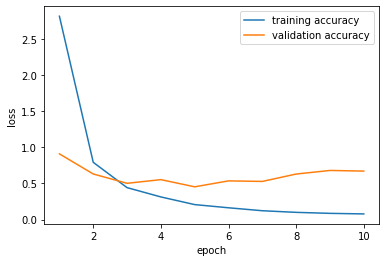

In [18]:
# Plot training and validation loss

epoch_nums = range(1,10+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper right')
plt.show()

In [9]:
# loading test data
test = pd.read_csv('Data/test/test_data.csv')
test


,Disease,Label
0,acne-excoriated-10.jpg,Acne
1,acne-cystic-65.jpg,Acne
2,acne-cystic-85.jpg,Acne
3,acne-open-comedo-73 (1).jpg,Acne
4,acne-cystic-39.jpg,Acne
...,...,...
106,lichen-planus-246.jpg,Lichen Planus
107,lichen-planus-49.jpg,Lichen Planus
108,8Psoriasis2-219.jpg,Lichen Planus
109,lichen-planus-70.jpg,Lichen Planus


In [12]:
# loading test images
test_image = []
for item in test['Disease']:
    img = image.load_img('Data/test/test_images/'+ item, target_size=(150, 150))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test_array = np.array(test_image)
test_array
#test_array.shape

array([[[[0.5686275 , 0.45490196, 0.32941177],
         [0.5529412 , 0.43137255, 0.30980393],
         [0.5686275 , 0.4392157 , 0.31764707],
         ...,
         [0.6431373 , 0.50980395, 0.4       ],
         [0.627451  , 0.49019608, 0.38039216],
         [0.61960787, 0.4745098 , 0.36078432]],

        [[0.58431375, 0.47058824, 0.3529412 ],
         [0.58431375, 0.4627451 , 0.34117648],
         [0.59607846, 0.46666667, 0.34509805],
         ...,
         [0.6313726 , 0.49803922, 0.3882353 ],
         [0.63529414, 0.49803922, 0.3882353 ],
         [0.61960787, 0.48235294, 0.3647059 ]],

        [[0.5568628 , 0.44313726, 0.3254902 ],
         [0.5882353 , 0.46666667, 0.3529412 ],
         [0.5803922 , 0.4509804 , 0.32941177],
         ...,
         [0.63529414, 0.5019608 , 0.39215687],
         [0.627451  , 0.49019608, 0.38039216],
         [0.60784316, 0.47058824, 0.3529412 ]],

        ...,

        [[0.36078432, 0.29411766, 0.21568628],
         [0.37254903, 0.30588236, 0.22745098]

In [21]:
prediction = model.predict_classes(test_array)

In [22]:
prediction

array([2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
label_encoder = LabelEncoder()
test_labels = label_encoder.fit_transform(test['Label'])
cf_matrix = confusion_matrix(test_labels, prediction)
cf_matrix

array([[31,  0,  9],
       [ 0, 31,  0],
       [ 6,  0, 34]], dtype=int64)

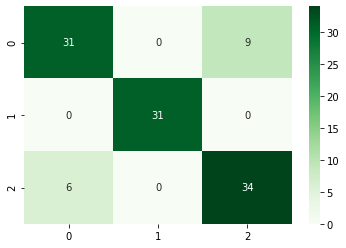

In [24]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, cmap='Greens')

In [6]:
# predicting the class of a loaded image


CATEGORIES = ['Acne', 'Eczema', 'Lichen Planus']
pic_list = []
pic = image.load_img('acne_vulgaris.jpg', target_size=(150, 150))
pic = image.img_to_array(pic)
pic = pic/255
pic_list.append(pic)
pic_array = np.array(pic_list)
pic_array.shape
model = keras.models.load_model("CNN.model")
prediction = model.predict(pic_array)
prediction

#print(CATEGORIES[prediction[0]])



array([[3.1653274e-04, 9.9712843e-01, 2.5549866e-03]], dtype=float32)